# Proyek Analisis Data: [PRSA_Data_Guanyuan_20130301-20170228]
- **Nama:** David
- **Email:** davidchang10203@gmail.com
- **ID Dicoding:** david_chang

## Menentukan Pertanyaan Bisnis

- pada tahun apa nilai PM10 yang memiliki nilai paling tinggi ?
- Di jam berapakah rata-rata jumlah PM10 di udara tertinggi ditahun 2015?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
prsa_df = pd.read_csv('/content/data/PRSA_Data_Guanyuan_20130301-20170228.csv')
prsa_df.head(15)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,3,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,4,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,5,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
5,6,2013,3,1,5,3.0,6.0,6.0,14.0,400.0,71.0,-2.2,1025.6,-19.6,0.0,N,3.7,Guanyuan
6,7,2013,3,1,6,6.0,6.0,6.0,20.0,400.0,66.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Guanyuan
7,8,2013,3,1,7,3.0,3.0,7.0,26.0,400.0,61.0,-1.6,1027.4,-19.1,0.0,NNW,3.8,Guanyuan
8,9,2013,3,1,8,3.0,6.0,9.0,37.0,500.0,50.0,0.1,1028.3,-19.2,0.0,NNW,4.1,Guanyuan
9,10,2013,3,1,9,7.0,11.0,9.0,30.0,400.0,58.0,1.2,1028.5,-19.3,0.0,N,2.6,Guanyuan


**Insight:**
- pada jam 9 malam nilai SO2 mengalami peningkatan yang signifikan dari 14.0 menjadi 24.0
- Nilai PM2.5 cenderung naik turun, tetapi naik signifikan pada jam 9 pagi dengan nilai 7.0 dan nilai PM2.5 tertinggi 14.0 pada jam 2 siang

### Assessing Data

In [3]:
prsa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34448 non-null  float64
 6   PM10     34635 non-null  float64
 7   SO2      34590 non-null  float64
 8   NO2      34405 non-null  float64
 9   CO       33311 non-null  float64
 10  O3       33891 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [4]:
prsa_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,616
PM10,429
SO2,474
NO2,659
CO,1753


In [5]:
prsa_df.duplicated().sum()

np.int64(0)

In [6]:
prsa_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496
std,10122.249256,1.177213,3.448752,8.800218,6.922285,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


**Insight:**
- Terdapat missing value yang signifikan
- Tidak ada data duplikat

### Cleaning Data

In [7]:
#Untuk kolom PM2.5, PM10, SO2, NO2, CO, dan O3 karena data polutan cenderung berkesinambungan, maka saya menggunakan teknik interpolasi

prsa_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']] = prsa_df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].interpolate(method='linear')

In [8]:
#Sama seperti kolom polutan, kolom cuaca (TEMP, PRES, DEWP, RAIN) juga berkesinambungan, jadi saya menggunakan teknik interpolasi linier

prsa_df[['TEMP', 'PRES', 'DEWP', 'RAIN']] = prsa_df[['TEMP', 'PRES', 'DEWP', 'RAIN']].interpolate(method='linear')

In [9]:
#Untuk kolom wd menggunakan teknik imputasi dengan Mode (yang paling sering muncul)

prsa_df['wd'] = prsa_df['wd'].fillna(prsa_df['wd'].mode()[0])

In [10]:
#Menggunakan interpolasi linier karena kecepatan angin biasanya berubah secara kontinu

prsa_df['WSPM'] = prsa_df['WSPM'].interpolate(method='linear')

In [11]:
prsa_df.isna().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


In [12]:
prsa_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.897522,109.372349,17.609312,58.139298,1258.327045,54.817142,13.581414,1011.851650,3.120296,0.067383,1.708577
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.070279,92.340966,23.631529,35.210206,1151.647467,57.199174,11.400426,10.404517,13.690314,0.909798,1.204180
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,40.000000,3.000000,31.000000,500.000000,6.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,59.000000,89.000000,8.000000,51.000000,900.000000,40.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,149.000000,22.000000,78.270244,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


In [13]:
prsa_df.to_csv("main_data.csv", index=False)

**Insight:**
- Missing value telah di isi menggunakan metode interpolasi linear dan imputasi mode
- Karena missing value telah terisi maka akan terjadi perubahan yang tidak signifikan

## Exploratory Data Analysis (EDA)

### Explore prsa_df

In [14]:
prsa_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
30526,30527,2016,8,23,22,89.0,89.0,6.0,61.0,1200.000000,67.000000,26.9,1001.2,21.4,0.0,NNE,1.1,Guanyuan
30367,30368,2016,8,17,7,43.0,89.0,2.0,69.0,900.000000,2.000000,24.8,1000.6,21.9,0.0,NE,0.7,Guanyuan
19142,19143,2015,5,7,14,49.0,166.0,4.0,32.0,600.000000,120.000000,23.9,1005.3,-1.1,0.0,SSE,2.5,Guanyuan
1848,1849,2013,5,17,0,78.0,131.0,32.0,44.0,1025.454545,85.251600,19.6,1008.9,11.9,0.0,SSE,2.1,Guanyuan
26953,26954,2016,3,28,1,57.0,132.0,15.0,66.0,600.000000,18.000000,14.9,1009.7,-8.6,0.0,SSW,2.4,Guanyuan
18026,18027,2015,3,22,2,34.0,212.0,2.0,10.0,200.000000,65.000000,12.8,1019.9,-18.1,0.0,N,3.8,Guanyuan
23853,23854,2015,11,19,21,67.0,67.0,3.0,44.0,1900.000000,2.000000,0.8,1023.2,0.2,0.0,ESE,1.6,Guanyuan
5886,5887,2013,11,1,6,224.0,240.0,16.0,113.0,2600.000000,2.128613,4.8,1021.4,4.2,0.0,NE,0.4,Guanyuan
22557,22558,2015,9,26,21,69.0,130.0,15.0,53.0,800.000000,118.000000,23.0,1008.5,9.0,0.0,SW,1.9,Guanyuan
19924,19925,2015,6,9,4,37.0,68.0,2.0,91.0,700.000000,5.000000,19.1,997.3,12.1,0.0,NE,1.1,Guanyuan


In [15]:
#untuk melihat nilai rata-rata PM2.5 dan PM10 perbulan dari tahun 2013 hinggan 2017
prsa_df.groupby(by=['year','month']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',})

PM2.5        PM10
year month                        
2013 3      102.719086  130.422043
     4       59.332639   95.813889
     5       80.557796  145.537634
     6      107.015278  122.360417
     7       65.992608   80.142473
     8       61.564516   81.948253
     9       80.006250   99.984722
     10      96.490591  119.961694
     11      79.463889  105.861806
     12      83.350806  107.077957
2014 1      100.872312  132.567204
     2      150.156994  157.043155
     3       94.819892  133.315860
     4       89.993750  137.106944
     5       63.343145  124.055914
     6       59.579861   76.429861
     7       85.889785  108.483871
     8       72.063306   87.692070
     9       70.280139   87.980139
     10     129.624328  148.301075
     11      89.371806  118.047639
     12      60.849462   84.967742
2015 1       94.840323  105.699462
     2       93.126488  114.458333
     3       85.121237  137.904099
     4       72.561806  119.621528
     5       54.707661  106.971774
     6       62.422222   83.920139
     7       67.381048   80.053763
     8       51.205645   69.446909
     9       53.315278   68.405556
     10      75.254032   94.365591
     11     120.823611  128.189583
     12     155.241263  166.792339
2016 1       67.235215   84.879704
     2       41.032328   56.758621
     3       95.076613  143.738575
     4       73.272917  128.474306
     5       56.946237  102.706317
     6       66.202083   86.065972
     7       80.118952   89.323925
     8       48.990591   65.403898
     9       57.248611   76.397917
     10      87.029570  111.128360
     11     107.031250  147.111806
     12     142.922715  164.618952
2017 1      116.233871  140.533602
     2       71.572917   89.375744

In [16]:
#untuk melihat nilai rata rata PM2.5 dan PM 10 perjam
prsa_df.groupby(by=['hour']).agg({
    'PM2.5': 'mean',
    'PM10': 'mean',})

,PM2.5,PM10
hour,,
0,91.172971,120.974064
1,90.678275,117.926601
2,88.271670,113.812197
3,86.556281,109.091701
4,84.146026,105.030731
5,81.074775,101.648161
6,79.291204,100.746198
7,78.329512,101.954343
8,78.298006,104.409304


**Insight:**
- nilai PM2.5 tertinggi 91.52 terjadi pada jam 11 malam dan semakin menurun setelah jam 11 malam dan cenderung naik lagi
- pada tahun 2015 nilai PM2.5 dan PM10 memiliki nilai tertinggi dengan nilai 155.21 dan 166.79 pada bulan desember

## Visualization & Explanatory Analysis

### Pertanyaan 1: - pada tahun apa nilai PM10 yang memiliki nilai paling tinggi ?

/tmp/ipython-input-2992641250.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pm10_per_year, x='year', y='PM10', palette='viridis')


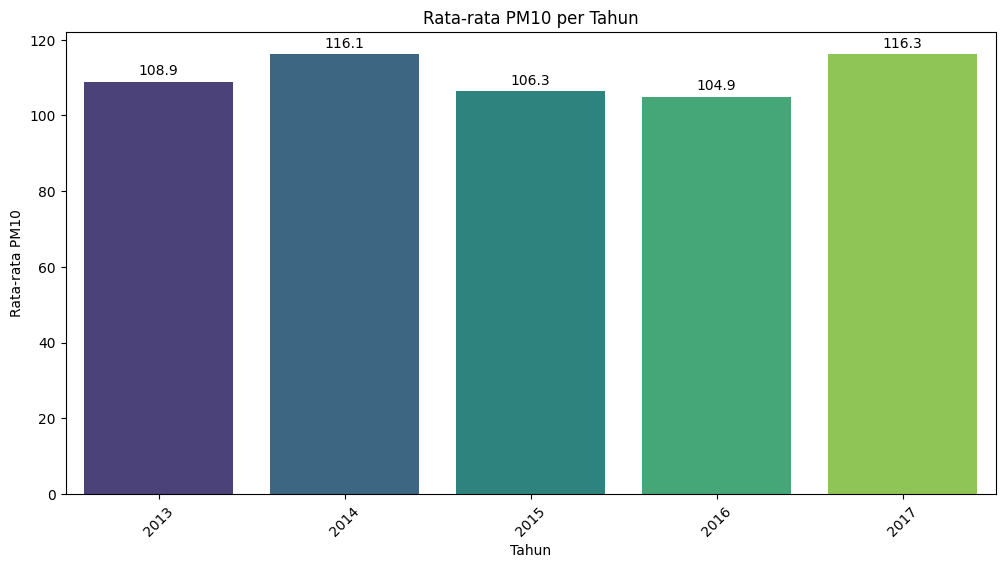

In [48]:
# Visualisasi untuk pertanyaan 1
plt.figure(figsize=(12, 6))

# Hitung rata-rata PM10 per tahun
pm10_per_year = prsa_df.groupby('year')['PM10'].mean().reset_index()

#visualisasi bar plot
plt.subplot(1, 1, 1)
sns.barplot(data=pm10_per_year, x='year', y='PM10', palette='viridis')
plt.title('Rata-rata PM10 per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Rata-rata PM10')
plt.xticks(rotation=45)

# nilai di atas bar
for i, v in enumerate(pm10_per_year['PM10']):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', va='bottom')


### Pertanyaan 2:  Di jam berapakah rata-rata jumlah PM10 di udara tertinggi ditahun 2015?

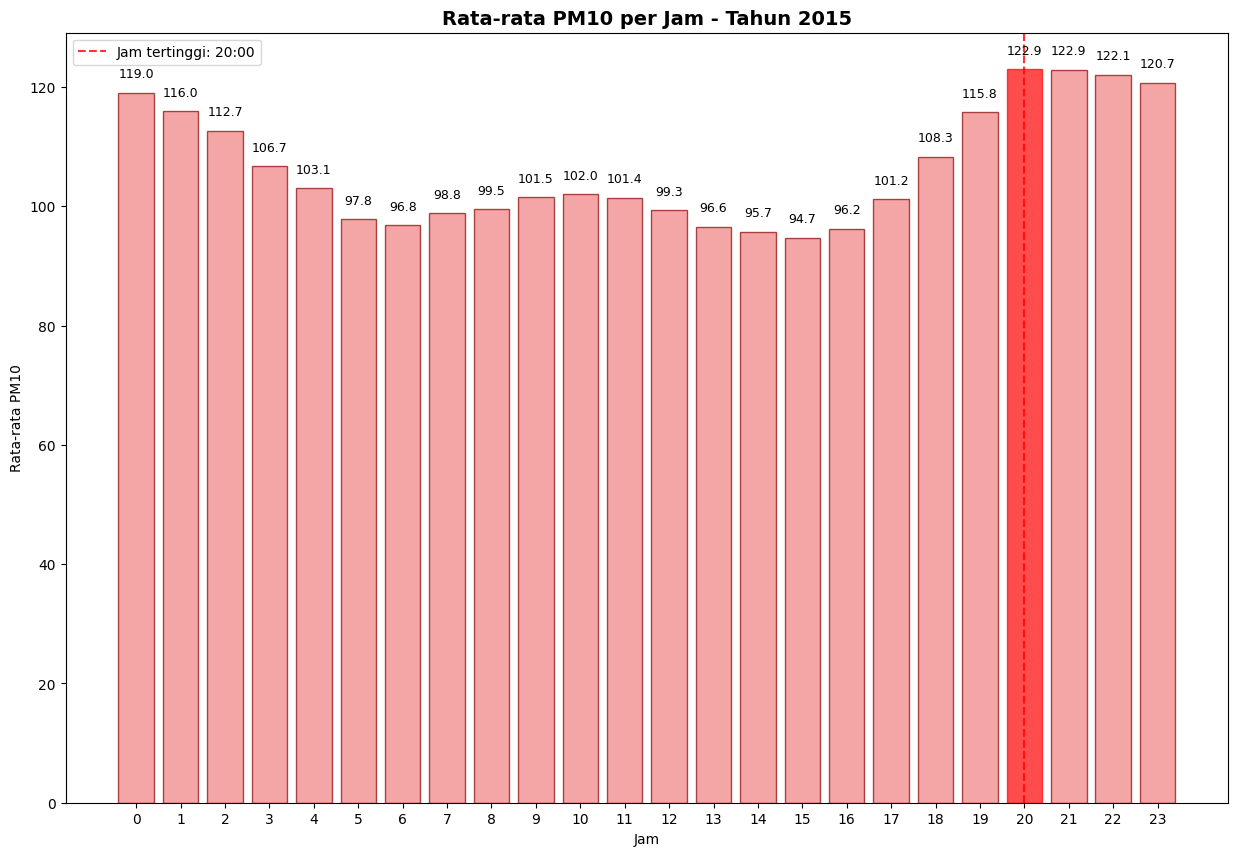

In [50]:
# Visualisasi untuk pertanyaan 2: PM10 per jam khusus tahun 2015
plt.figure(figsize=(15, 10))

# Filter data untuk tahun 2015
prsa_2015 = prsa_df[prsa_df['year'] == 2015]

# Hitung rata-rata PM10 per jam untuk tahun 2015
pm10_per_hour_2015 = prsa_2015.groupby('hour')['PM10'].mean().reset_index()

# Highlight jam dengan PM10 tertinggi
max_hour_2015 = pm10_per_hour_2015.loc[pm10_per_hour_2015['PM10'].idxmax(), 'hour']
max_value_2015 = pm10_per_hour_2015.loc[pm10_per_hour_2015['PM10'].idxmax(), 'PM10']
plt.axvline(x=max_hour_2015, color='red', linestyle='--', alpha=0.8,
            label=f'Jam tertinggi: {int(max_hour_2015)}:00')
plt.legend()

# Plot 2: Bar plot untuk visualisasi yang lebih jelas
plt.subplot(1, 1, 1)
bars = plt.bar(pm10_per_hour_2015['hour'], pm10_per_hour_2015['PM10'],
               color='lightcoral', edgecolor='darkred', alpha=0.7)
# Highlight bar tertinggi
bars[int(max_hour_2015)].set_color('red')
plt.title('Rata-rata PM10 per Jam - Tahun 2015', fontsize=14, fontweight='bold')
plt.xlabel('Jam')
plt.ylabel('Rata-rata PM10')
plt.xticks(range(0, 24))

# Tambahkan nilai pada bar
for i, (hour, value) in enumerate(zip(pm10_per_hour_2015['hour'], pm10_per_hour_2015['PM10'])):
    plt.text(hour, value + 2, f'{value:.1f}', ha='center', va='bottom', fontsize=9)




**Insight:**
- Pada tahun 2016 merupakan tahun dengan polutan udara terkecil
- polutan udara mengalami penurunan pada jam 5 pagi dan cenderung stabil hingga siang hari dan puncak polutan tertinggi terjadi pada jam 8 atau 9 malam

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Nilai tertingi PM10 terjadi pada tahun 2017 dengan nilai PM10 116.3
- Conclution pertanyaan 2 : Pada tahun 2015 nilai PM10 memiliki nilai tertinggi pada jam 8 dan 9 malam